# Multidimensional Scaling

### Table of Contents

<br />
<br />
<br />

* Introduction
 * About This Notebook
 * About This Dataset
 * About Multidimensional Scaling
* Load the Data
* Multidimensional Scaling: 2 Dimensions
* Multidimensional Scaling: 3 Dimensions

<br />
<br />
<br />


## Introduction

### About This Notebook

Because of its similarities to PCA, this notebook will not implement multidimensional scaling "by hand," although it would be easy to do by simply replicating the steps in the PCA notebook. Rather, this notebook will utilize the multidimensional scaling functionality built into scikit-learn.

### About This Dataset

This dataset is the NIST handwritten digit classification data set, a data set popular for its simplicity, and for being a nice introduction to image classification for machine learning appications.

### About Multidimensional Scaling

Suppose we have a set of $N$ points, and we know the distance between pairs of points $P_{ij}$ for $i, j = 1 \dots N$. However, we do not know the coordinates of the points or how the distances are calculated. Multidimensional scaling attempts to lower the dimensionality of the data set by reducing the number of dimensions, subject to the restriction that the distances between each of the points should be preserved in the lower dimensional space.

Thus, this is a method focused on preserving the norm of the distance between various points (preserving their relationships), rather than explaining the most amount of variance in the data possible. 

Suppose there is a sample $\mathbf{X}$ with $N$ points, and we're talking about a $d$-dimensional parameter space, $\mathbf{X}_i \in \mathfrak{R}^d$. In our case, the points are observations and the $d$-dimensional space is the pixel data. 

Then the the square of the Euclidean distance between two points $i$ and $j$ is:

$$
d_{ij}^2 = \| \mathbf{X}_i - \mathbf{X}_j \|^2
$$

We construct a matrix from the distance metric $\mathbf{B}$, similar to how PCA constructs a covariance matrix $\mathbf{C}$ from the variance metric. We can compute the eigenvalues of this distance matrix, $\mathbf{B}$

We find the eigenvalues and eigenvectors of $\mathbf{B}$, denoted $\lambda_j$ and $\mathbf{c}_j$, respectively. Next, we decide on a number of reduced dimensions $k$. Then the new dimension $z_j$ of our multidimensional scaling (where $j$ indexes the number of reduced dimensions $k$) is:

$$
\mathbf{z}_j = \sqrt{\lambda_j} \mathbf{c}_j
$$

where $j = 1, \dots, k$ is the index over the number of _reduced_ dimensions.

We can see that under the hood, PCA and MDS are very similar: they both perform an eigenvalue analysis of a matrix formed using a metric (covariance for PCA, Euclidean distances for MDS).

In [2]:
%matplotlib notebook

# numbers
import numpy as np
import pandas as pd

# stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# utils
import os, re
from pprint import pprint

## Load the Data

To load the data, we'll follow steps in the PCA notebook, including standardizing and normalizing it.

In [3]:
## No learning, no testing.
#testing_df = pd.read_csv('data/optdigits/optdigits.tes',header=None)
#X_testing,  y_testing  = testing_df.loc[:,0:63],  testing_df.loc[:,64]

training_df = pd.read_csv('data/optdigits/optdigits.tra',header=None)
X_training, y_training = training_df.loc[:,0:63], training_df.loc[:,64]

In [4]:
print X_training.shape
print y_training.shape

(3823, 64)
(3823,)


In [5]:
def get_normed_mean_cov(X):
    X_std = StandardScaler().fit_transform(X)
    X_mean = np.mean(X_std, axis=0)
    
    ## Automatic:
    #X_cov = np.cov(X_std.T)
    
    # Manual:
    X_cov = (X_std - X_mean).T.dot((X_std - X_mean)) / (X_std.shape[0]-1)
    
    return X_std, X_mean, X_cov

X_std, X_mean, X_cov = get_normed_mean_cov(X_training)

## Multidimensional Scaling: 2 Dimensions

Projecting the full 64-dimensional input to 2 dimensions will lead to a loss of a lot of information - similar to trying to use only 2 principal components. However, it's still useful to do it and visualize it to see what kind of results we'll get, and extend this approach to higher dimensions.

In [6]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [22]:
n_samples = 300
similarities = euclidean_distances(X_std[:n_samples])

In [27]:
#mds = manifold.MDS(n_components=2, max_iter=1000, eps=1e-3,
#                   n_jobs=1)
#pos = mds.fit(similarities).embedding_

In [28]:
def get_cmap(n):
    #colorz = plt.cm.cool
    colorz = plt.get_cmap('Set1')
    return[ colorz(float(i)/n) for i in range(n)]

colorz = get_cmap(10)
colors = [colorz[yy] for yy in y_training]

In [29]:
#fig = plt.figure(figsize=(4,4))
#plt.scatter(pos[:,0],pos[:,1],c=colors)
#plt.show()

In [30]:
mds2 = manifold.MDS(n_components=2, max_iter=1000, eps=1e-3,
                   dissimilarity="precomputed", n_jobs=1)
pos2 = mds2.fit(similarities).embedding_

In [31]:
print pos2.shape

(300, 2)


<IPython.core.display.Javascript object>


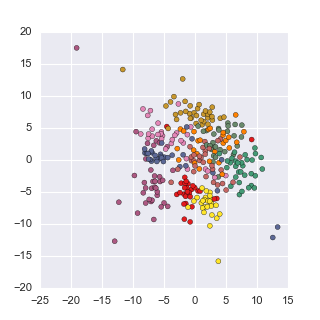

In [32]:
fig = plt.figure(figsize=(4,4))
plt.scatter(pos2[:,0],pos2[:,1],c=colors)
plt.show()

## Multidimensional Scaling: 3 Dimensions

Using a 3-component mutlidimensional scaling model and a 3D scatterplot leads to some improvement:

In [33]:
n_samples = 400
similarities = euclidean_distances(X_std[:n_samples])

In [38]:
mds3 = manifold.MDS(n_components=3, max_iter=1000, eps=1e-4,
                   dissimilarity="precomputed", n_jobs=1)
pos3 = mds3.fit(similarities).embedding_

In [39]:
print pos3.shape

(400, 3)


In [40]:
def get_cmap(n):
    #colorz = plt.cm.cool
    colorz = plt.get_cmap('Set1')
    return[ colorz(float(i)/n) for i in range(n)]

colorz = get_cmap(10)
colors = [colorz[yy] for yy in y_training[:n_samples]]

<IPython.core.display.Javascript object>


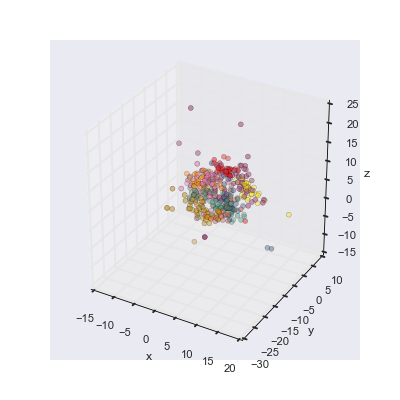

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(pos3[:,0],pos3[:,1],pos3[:,2],c=colors)
    
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

plt.show()

In [52]:
n_samples = 1000
similarities = euclidean_distances(X_std[:n_samples])

In [53]:
print X_std.shape

(3823, 64)


In [72]:
# XXXXXXXXXXXXXXXXXXXXXXXXX
# This takes a while.
# XXXXXXXXXXXXXXXXXXXXXXXXX
mds4 = manifold.MDS(n_components=4, max_iter=500, eps=1e-3,
                   dissimilarity="precomputed", n_jobs=1)
fit4 = mds4.fit(similarities)
pos4 = fit4.embedding_

In [55]:
def get_cmap(n):
    #colorz = plt.cm.cool
    colorz = plt.get_cmap('Set1')
    return[ colorz(float(i)/n) for i in range(n)]

colorz = get_cmap(10)
colors = [colorz[yy] for yy in y_training[:n_samples]]

<IPython.core.display.Javascript object>


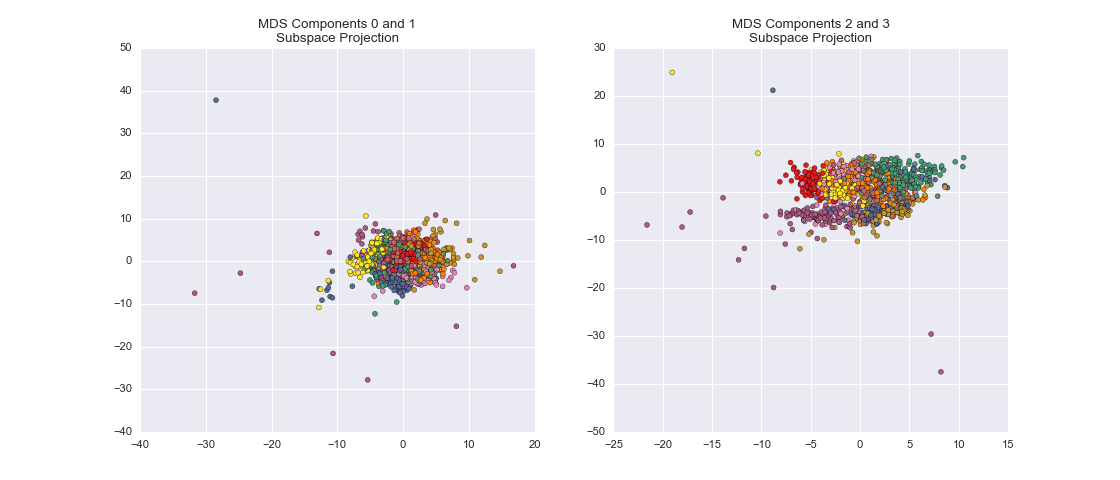

In [56]:
fig = plt.figure(figsize=(14,6))
ax1, ax2 = [fig.add_subplot(120 + i + 1) for i in range(2)]

ax1.scatter( pos4[:,0], pos4[:,1] , c=colors )
ax1.set_title('MDS Components 0 and 1\nSubspace Projection')

ax2.scatter( pos4[:,2], pos4[:,3] , c=colors )
ax2.set_title('MDS Components 2 and 3\nSubspace Projection')

plt.show()

<IPython.core.display.Javascript object>


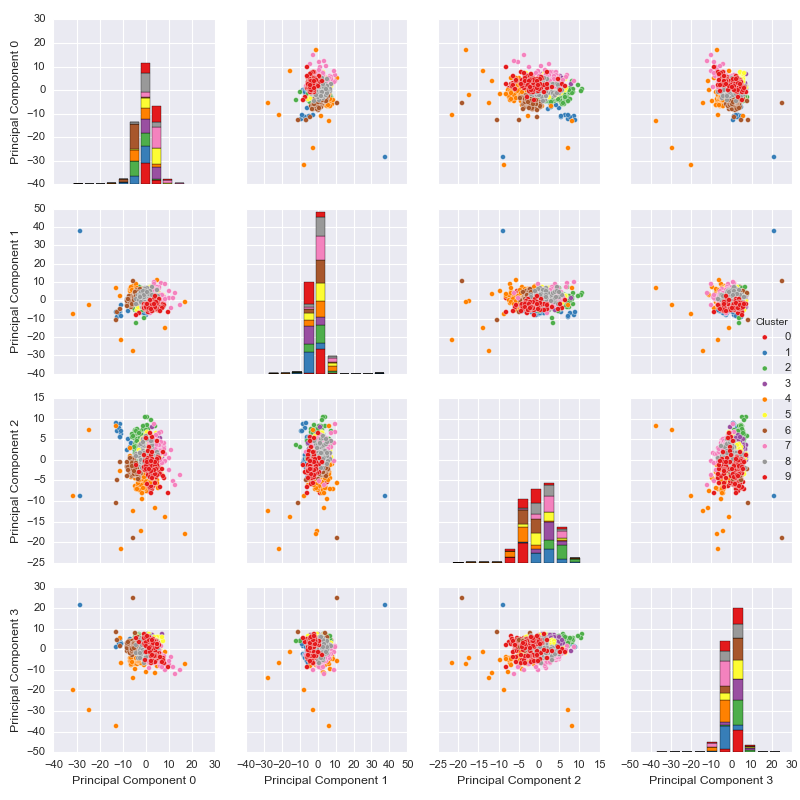

In [60]:
pairplot_df = pd.DataFrame(pos4, columns=['Principal Component '+str(j) for j in range(pos4.shape[1])])
pairplot_df.reindex(pairplot_df.columns.sort_values(ascending=True))
z_columns = pairplot_df.columns

pairplot_df['Cluster'] = y_training
pairplot_df = pairplot_df.sort_values('Cluster',ascending=True)
sns.pairplot(pairplot_df, hue='Cluster', 
             vars=z_columns, # don't plot the category/system response
             palette='Set1')
plt.show()

This four-component multidimensional scaling (MDS) is a lot messier than four-component principal component analysis (PCA).

## Sammon Mapping

Like with PCA, MDS reduces a high-dimensional input $\mathbf{X}$ into a low-dimensional input $\mathbf{Z}$ in a linear way, using a projection matrix $\mathbf{W}$:

$$
\mathbf{Z} = \mathbf{W}^{T} \mathbf{X}
$$

Sammon mapping utilizes the idea of a general mapping function $\mathbf{g(\theta)}$ that takes a vector of parameters $\theta$. This method seeks to minimize the stress on the training data. The linear technique above uses a linear form of $\mathbf{g}$, but a nonlinear form can also be used.

In [73]:
"""
    Link        : https://github.com/tompollard/sammon
    File        : sammon.py
    Date        : 18 April 2014
    Authors     : Tom J. Pollard (tom.pollard.11@ucl.ac.uk)
                : Ported from MATLAB implementation by 
                  Gavin C. Cawley and Nicola L. C. Talbot
    Description : Simple python implementation of Sammon's non-linear
                  mapping algorithm [1].
    References  : [1] Sammon, John W. Jr., "A Nonlinear Mapping for Data
                  Structure Analysis", IEEE Transactions on Computers,
                  vol. C-18, no. 5, pp 401-409, May 1969.
    Copyright   : (c) Dr Gavin C. Cawley, November 2007.
    This program is free software; you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation; either version 2 of the License, or
    (at your option) any later version.
    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.
    You should have received a copy of the GNU General Public License
    along with this program; if not, write to the Free Software
    Foundation, Inc., 59 Temple Place, Suite 330, Boston, MA 02111-1307 USA
"""

def sammon(x, n = 2, display = 2, inputdist = 'raw', maxhalves = 20, maxiter = 500, tolfun = 1e-9, init = 'pca'):

    import numpy as np 

    """Perform Sammon mapping on dataset x
    y = sammon(x) applies the Sammon nonlinear mapping procedure on
    multivariate data x, where each row represents a pattern and each column
    represents a feature.  On completion, y contains the corresponding
    co-ordinates of each point on the map.  By default, a two-dimensional
    map is created.  Note if x contains any duplicated rows, SAMMON will
    fail (ungracefully). 
    [y,E] = sammon(x) also returns the value of the cost function in E (i.e.
    the stress of the mapping).
    An N-dimensional output map is generated by y = sammon(x,n) .
    A set of optimisation options can be specified using optional
    arguments, y = sammon(x,n,[OPTS]):
       maxiter        - maximum number of iterations
       tolfun         - relative tolerance on objective function
       maxhalves      - maximum number of step halvings
       input          - {'raw','distance'} if set to 'distance', X is 
                        interpreted as a matrix of pairwise distances.
       display        - 0 to 2. 0 least verbose, 2 max verbose.
       init           - {'pca', 'random'}
    The default options are retrieved by calling sammon(x) with no
    parameters.
    """

    def euclid(a,b):
        d = np.sqrt( ((a**2).sum(axis=1)*np.ones([1,b.shape[0]]).T).T + \
            np.ones([a.shape[0],1])*(b**2).sum(axis=1)-2*(np.dot(a,b.T)))
        return d

    # Create distance matrix unless given by parameters
    if inputdist == 'distance':
        D = x
    else:
        D = euclid(x,x)

    # Remaining initialisation
    N = x.shape[0] # hmmm, shape[1]?
    scale = 0.5 / D.sum()
    D = D + np.eye(N)
    Dinv = 1 / D # Returns inf where D = 0.
    Dinv[np.isinf(Dinv)] = 0 # Fix by replacing inf with 0 (default Matlab behaviour).
    if init == 'pca':
        [UU,DD,_] = np.linalg.svd(x)
        y = UU[:,:n]*DD[:n] 
    else:
        y = np.random.normal(0.0,1.0,[N,n])
    one = np.ones([N,n])
    d = euclid(y,y) + np.eye(N)
    dinv = 1. / d # Returns inf where d = 0. 
    dinv[np.isinf(dinv)] = 0 # Fix by replacing inf with 0 (default Matlab behaviour).
    delta = D-d 
    E = ((delta**2)*Dinv).sum() 

    # Get on with it
    for i in range(maxiter):

        # Compute gradient, Hessian and search direction (note it is actually
        # 1/4 of the gradient and Hessian, but the step size is just the ratio
        # of the gradient and the diagonal of the Hessian so it doesn't
        # matter).
        delta = dinv - Dinv
        deltaone = np.dot(delta,one)
        g = np.dot(delta,y) - (y * deltaone)
        dinv3 = dinv ** 3
        y2 = y ** 2
        H = np.dot(dinv3,y2) - deltaone - np.dot(2,y) * np.dot(dinv3,y) + y2 * np.dot(dinv3,one)
        s = -g.flatten(order='F') / np.abs(H.flatten(order='F'))
        y_old    = y

        # Use step-halving procedure to ensure progress is made
        for j in range(maxhalves):
            s_reshape = s.reshape(2,len(s)/2).T
            y = y_old + s_reshape
            d = euclid(y, y) + np.eye(N)
            dinv = 1 / d # Returns inf where D = 0. 
            dinv[np.isinf(dinv)] = 0 # Fix by replacing inf with 0 (default Matlab behaviour).
            delta = D - d
            E_new = ((delta**2)*Dinv).sum()
            if E_new < E:
                break
            else:
                s = np.dot(0.5,s)

        # Bomb out if too many halving steps are required
        if j == maxhalves:
            print('Warning: maxhalves exceeded. Sammon mapping may not converge...')

        # Evaluate termination criterion
        if np.abs((E - E_new) / E) < tolfun:
            if display:
                print('TolFun exceeded: Optimisation terminated')
            break

        # Report progress
        E = E_new
        if display > 1:
            print('epoch = ' + str(i) + ': E = ' + str(E * scale))

    # Fiddle stress to match the original Sammon paper
    E = E * scale
    
    return [y,E]

In [ ]:
y, E = sammon()